#Python基础与数据可视化的大作业
分析One World In Data 的Covid-19数据～

####几个乱七八糟的Import～

In [ ]:
pip install geopandas

In [ ]:
pip install mapclassify

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import geopandas as gpd
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

####先来打印一下前几行试试/基础工作

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN,NaN,NaN,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
df.columns 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

####整理一下数据



In [ ]:
date_rearranged_df = df.sort_values(['date'],ascending= True)
latest_date = date_rearranged_df['date'].iat[-1]

In [ ]:
total_df = df[['iso_code','location','date','total_cases','total_deaths']]
total_cases_df = total_df[total_df.date == latest_date].sort_values(['total_cases'],ascending=False)[1:11]
total_deaths_df = total_df[total_df.date == latest_date].sort_values(['total_deaths'],ascending=False)[1:11]

####总案例数前十

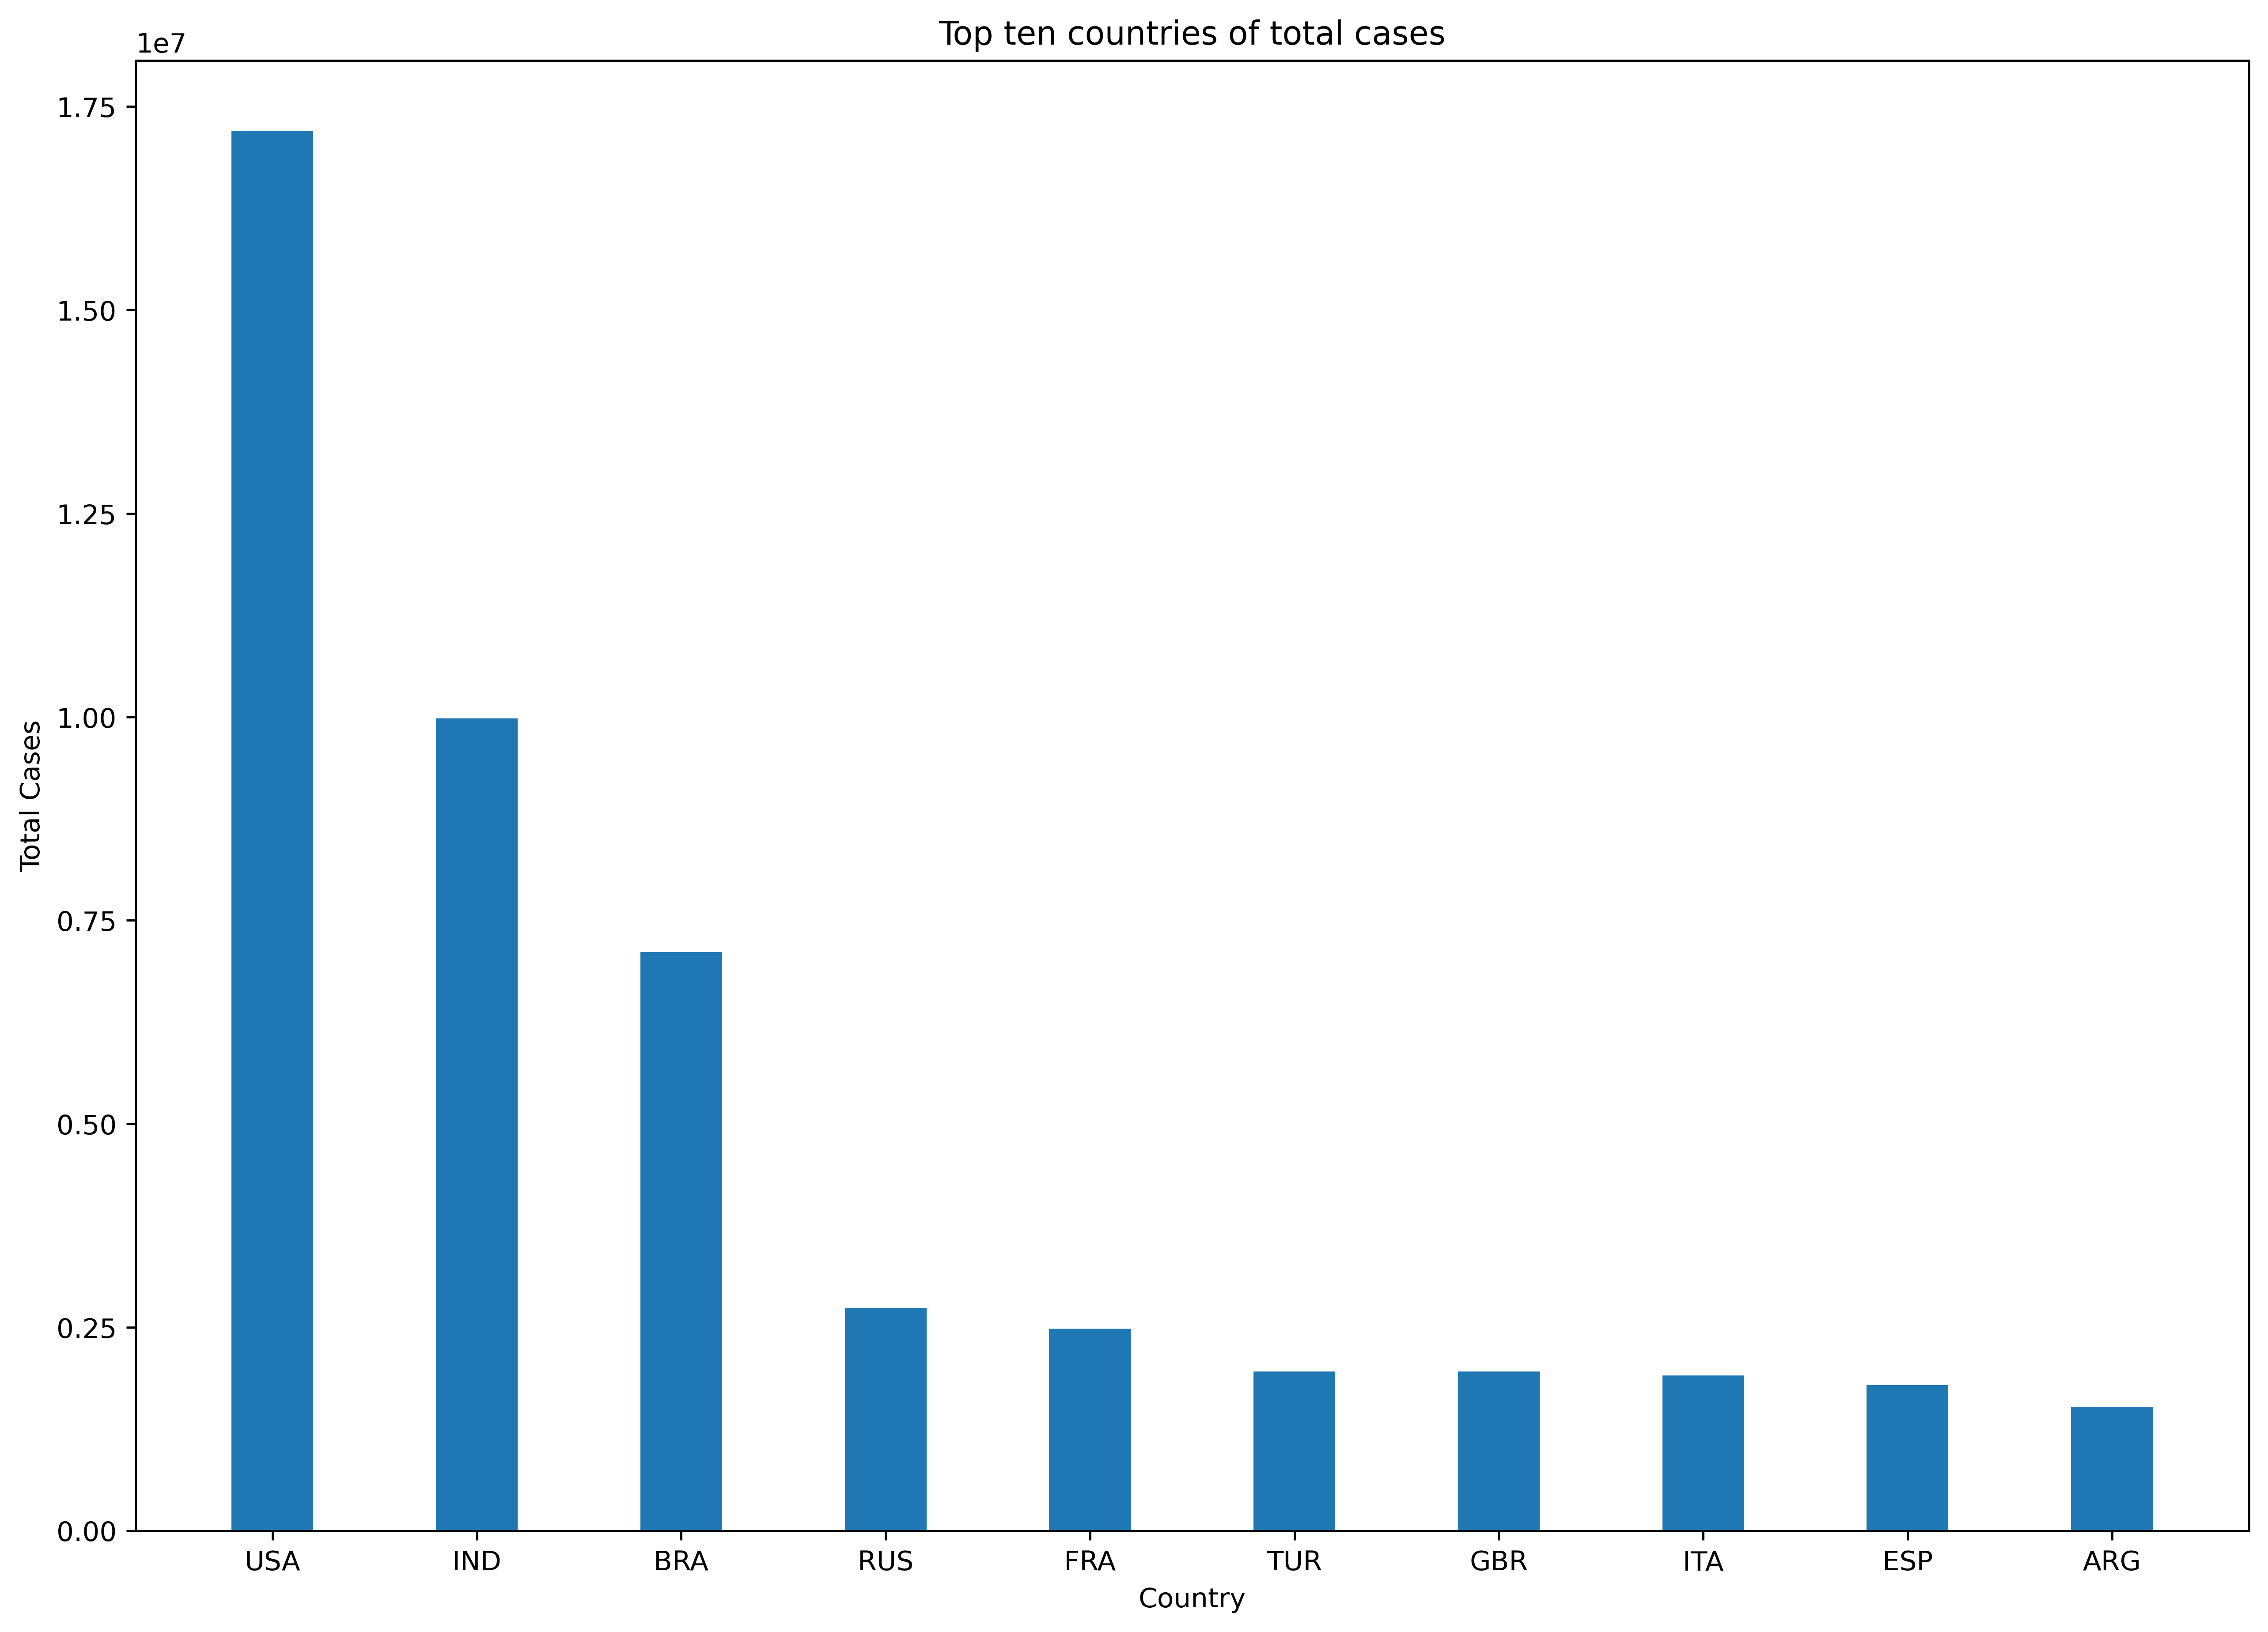

In [ ]:
_x = total_cases_df.iso_code
_y = total_cases_df.total_cases
 
plt.figure(figsize=(14,10), dpi = 441)
plt.bar(range(len(_x)),_y,width = 0.4)
 
#for xx, yy in zip(range(len(_x)),_y):
#    plt.text(xx, yy+5, str(yy), ha='center')
 
plt.xticks(range(len(_x)),_x)
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.title('Top ten countries of total cases')
plt.show()

####总死亡数前十

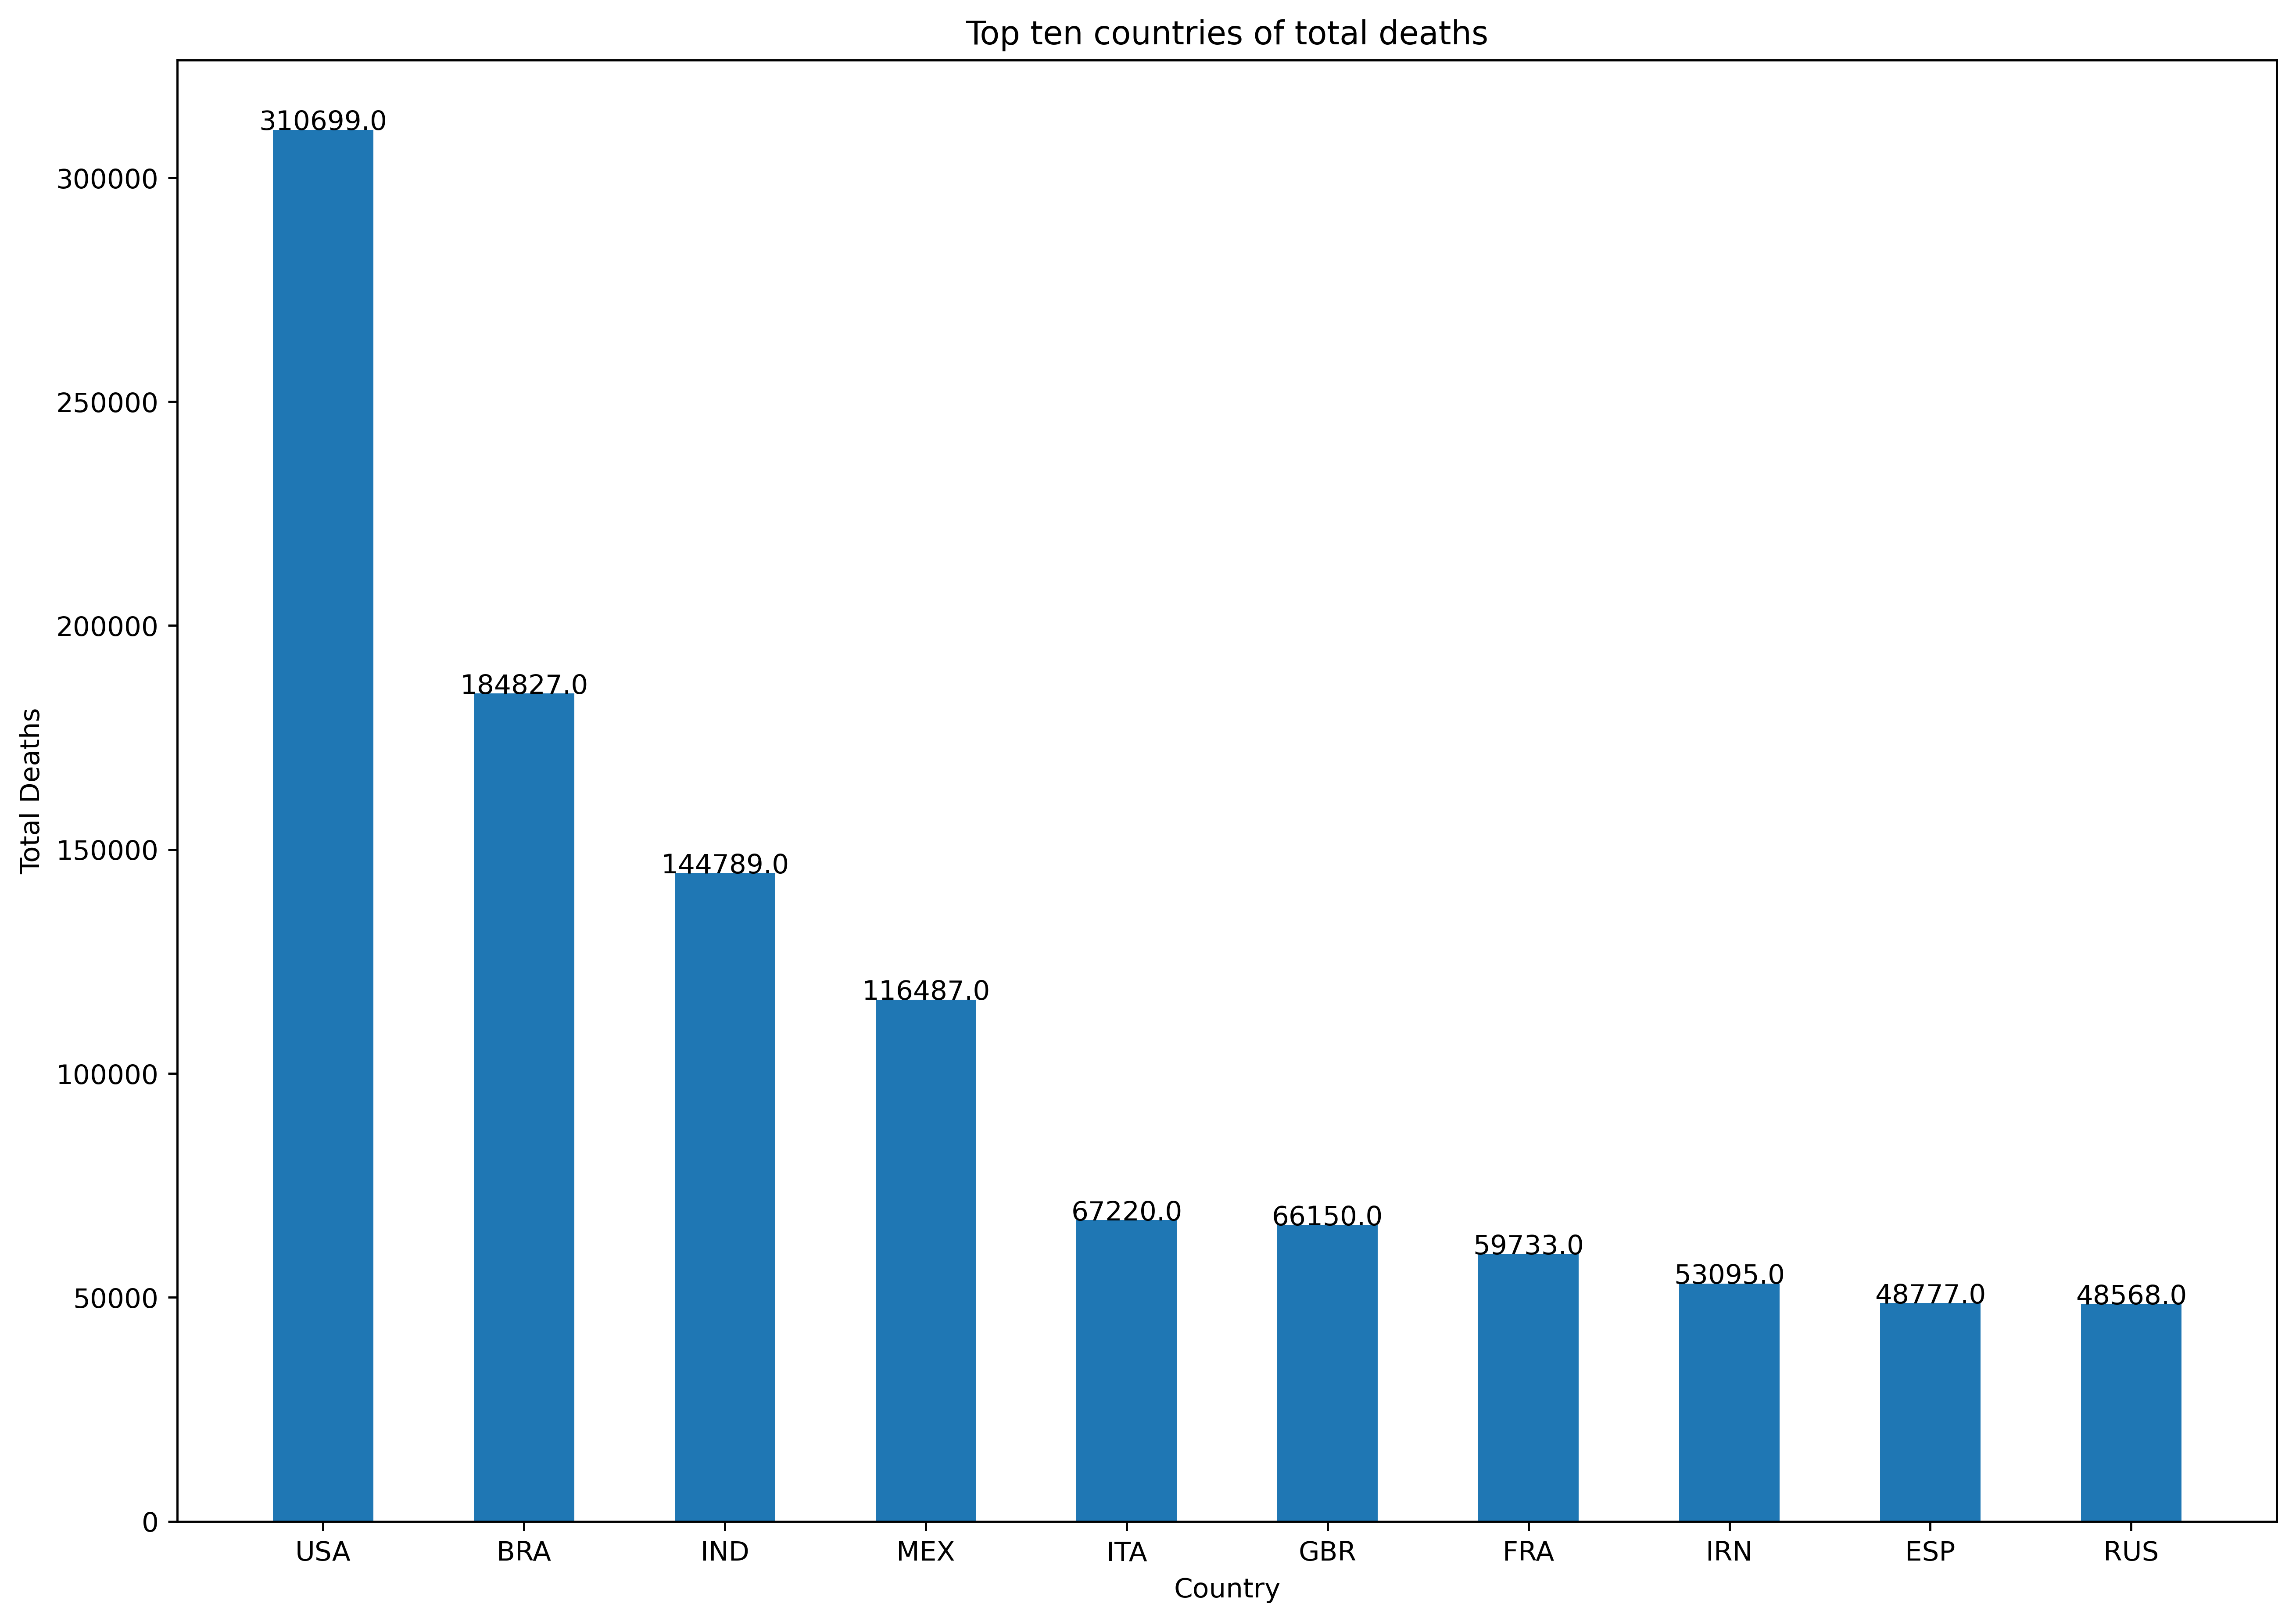

In [ ]:
_x = total_deaths_df.iso_code
_y = total_deaths_df.total_deaths

plt.figure(figsize=(14,10), dpi = 441)
plt.bar(range(len(_x)),_y,width = 0.5)

for xx, yy in zip(range(len(_x)),_y):
    plt.text(xx, yy+5, str(yy), ha='center')


plt.xticks(range(len(_x)),_x)
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.title('Top ten countries of total deaths')
plt.show()

####美国新增案例折线图
先提取出date和new_cases列，把NaN替换成0
再把yyyy-mm-dd格式的日期改换成mm-dd

In [76]:
US_new_cases_df = df[df.iso_code == 'USA'][['date','new_cases']].fillna(0)
US_new_cases_df['date'] = US_new_cases_df['date'].apply(lambda x:x[-5:])
US_new_cases_df

,date,new_cases
51787,01-22,0.0
51788,01-23,0.0
51789,01-24,1.0
51790,01-25,0.0
51791,01-26,3.0
...,...,...
52113,12-13,191142.0
52114,12-14,192846.0
52115,12-15,198766.0
52116,12-16,247403.0


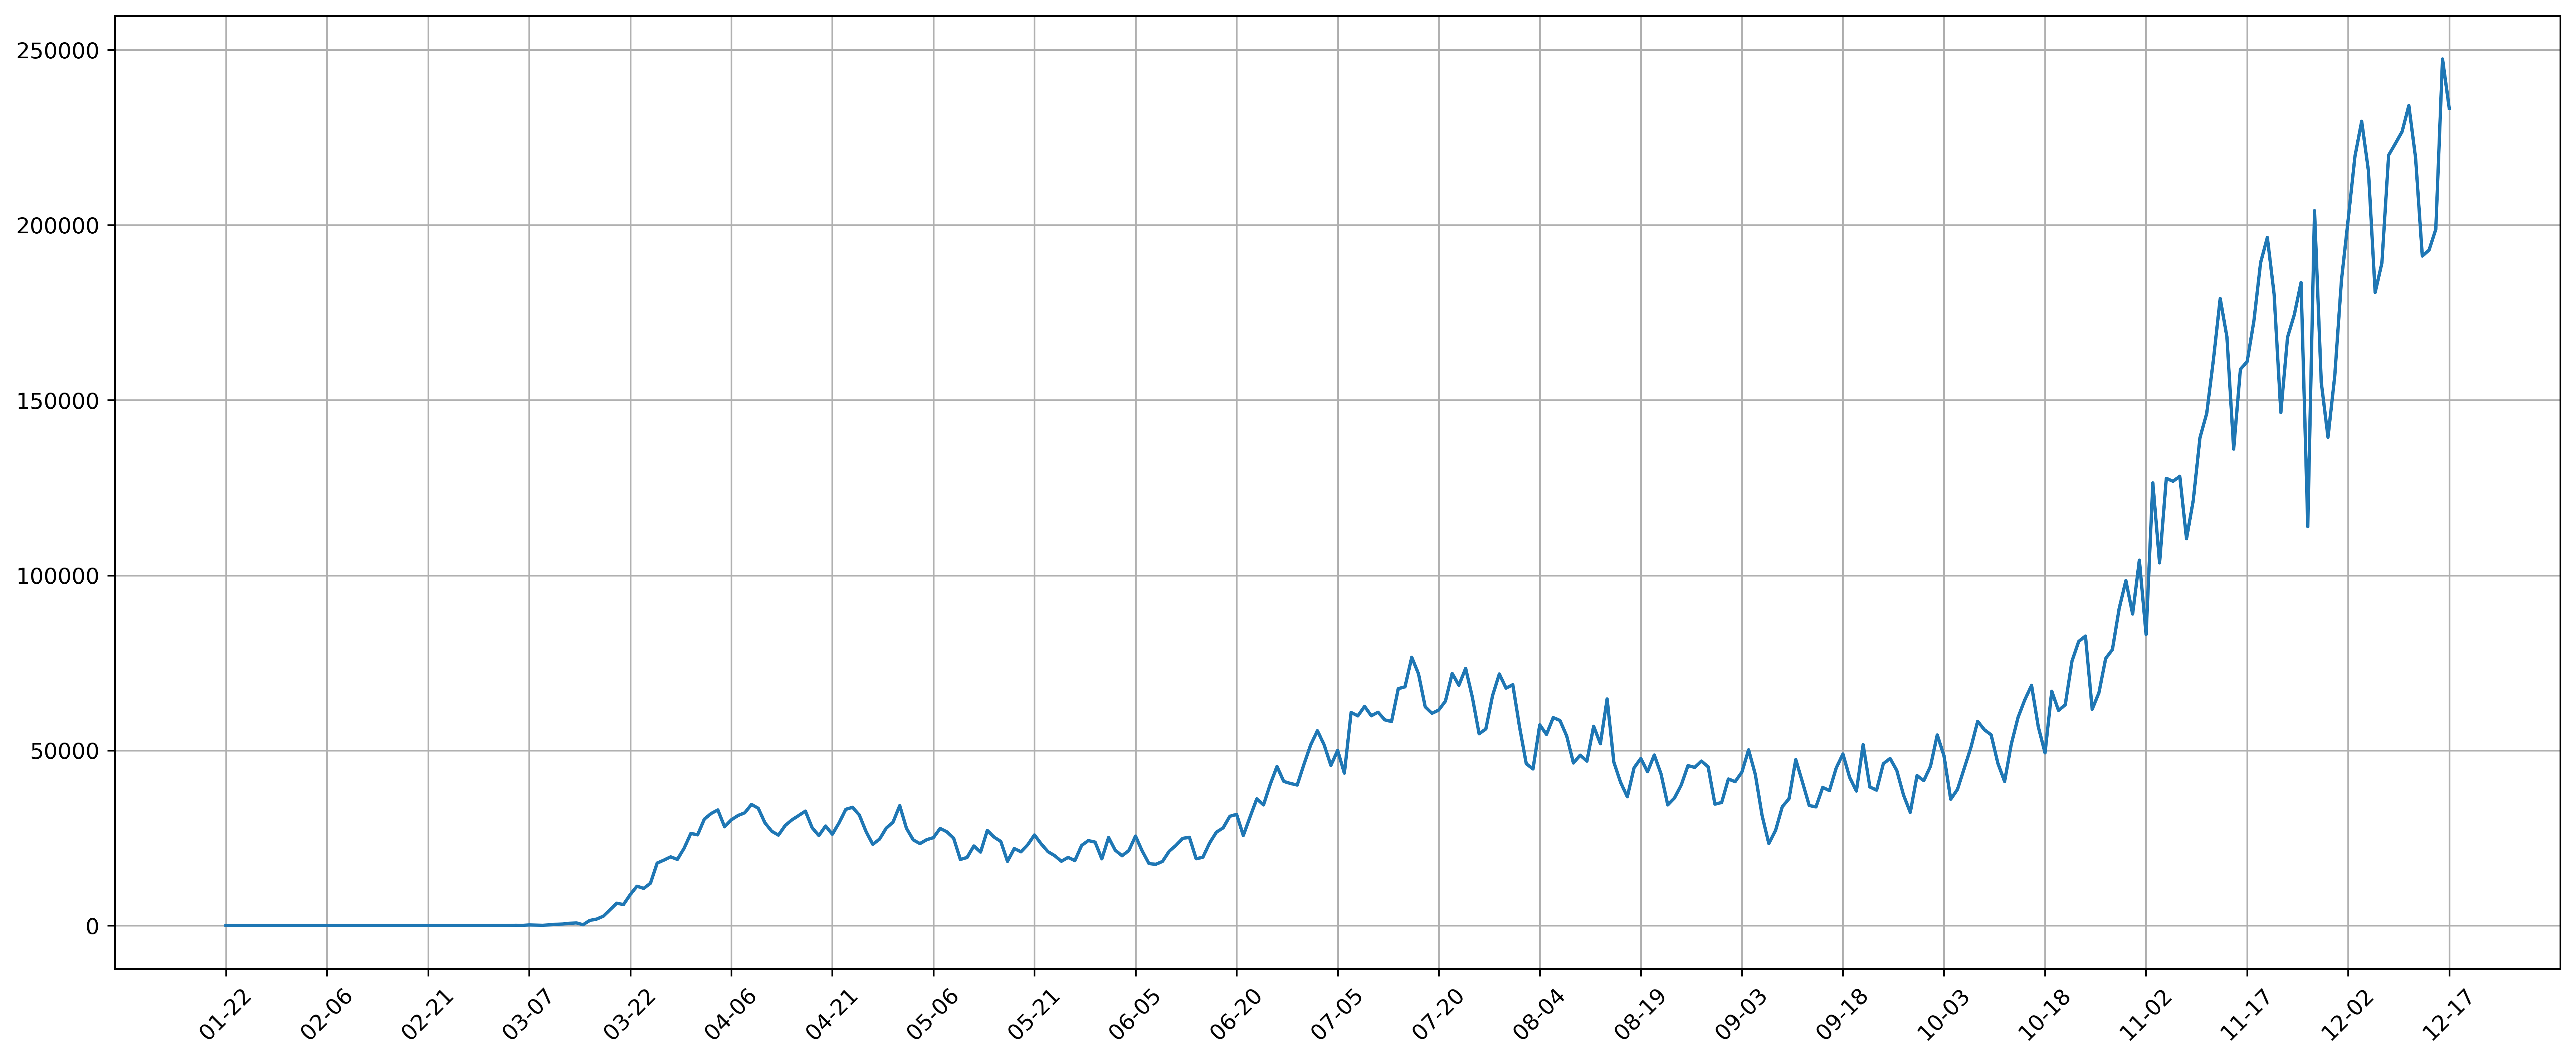

In [ ]:
_x = US_new_cases_df.date
_y = US_new_cases_df.new_cases

plt.figure(figsize = (20,8),dpi = 441)

plt.plot(range(len(_x)),_y)
plt.xticks(range(len(_x))[::15],_x[::15],rotation = 45)
plt.grid()
plt.show()

####挑几个国家出来

In [ ]:
countries_wanted = ['USA','IND','BRA','MEX','GBR','FRA','CHN']
#把想要的国家的列表给挑出来
wanted_df = date_rearranged_df[date_rearranged_df.iso_code.isin(countries_wanted)]
#把new_cases为NaN的去掉
wanted_df = wanted_df.drop(wanted_df[wanted_df.new_cases.isna()].index)
wanted_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10147,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
51788,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
10148,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
51789,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
10149,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,CHN,Asia,China,2020-12-17,94734.0,108.0,101.286,4759.0,2.0,1.571,65.818,0.075,0.070,3.306,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
52117,USA,North America,United States,2020-12-17,17206647.0,233271.0,216674.857,310699.0,3270.0,2633.143,51983.412,704.741,654.602,938.660,9.879,7.955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
51786,GBR,Europe,United Kingdom,2020-12-17,1954268.0,35532.0,23093.857,66150.0,532.0,424.429,28787.495,523.407,340.186,974.428,7.837,6.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
22433,IND,Asia,India,2020-12-17,9979447.0,22890.0,26100.429,144789.0,338.0,372.000,7231.460,16.587,18.913,104.919,0.245,0.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1158960.0,157805240.0,114.351,0.84,1006502.0,0.729,0.026,38.6,samples tested,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640


In [ ]:
cn_df = wanted_df[wanted_df.iso_code =='CHN']
cn_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10147,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,0.447,0.066,NaN,0.013,0.001,NaN,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
10148,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,0.639,0.192,NaN,0.018,0.006,NaN,3.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
10149,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,0.977,0.338,NaN,0.029,0.011,NaN,3.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
10150,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,1.442,0.465,NaN,0.039,0.010,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
10151,CHN,Asia,China,2020-01-27,2877.0,802.0,NaN,82.0,26.0,NaN,1.999,0.557,NaN,0.057,0.018,NaN,3.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10472,CHN,Asia,China,2020-12-13,94328.0,111.0,107.286,4751.0,2.0,0.714,65.536,0.077,0.075,3.301,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
10473,CHN,Asia,China,2020-12-14,94427.0,99.0,108.143,4754.0,3.0,1.143,65.605,0.069,0.075,3.303,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
10474,CHN,Asia,China,2020-12-15,94537.0,110.0,107.857,4757.0,3.0,1.571,65.682,0.076,0.075,3.305,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
10475,CHN,Asia,China,2020-12-16,94626.0,89.0,104.000,4757.0,0.0,1.286,65.743,0.062,0.072,3.305,0.000,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752


####相关性热力图

挑出某些社会性指标，创建这些社会性指标与总案例数的相关性热力图

In [ ]:
social_keys =['population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']
social_df = wanted_df[wanted_df.date == latest_date][['iso_code','total_cases']+social_keys]

social_df

,iso_code,total_cases,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
32129,MEX,1289298.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
6967,BRA,7110434.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
10476,CHN,94734.0,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
52117,USA,17206647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
51786,GBR,1954268.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
22433,IND,9979447.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
17731,FRA,2483524.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901


In [ ]:
#groups = social_df.groupby('iso_code')
#groups.apply(lambda group: sns.heatmap(group.corr()))

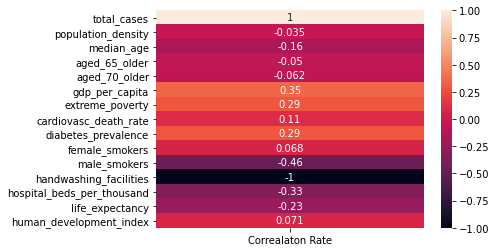

In [ ]:
heatmap_df = pd.DataFrame({'Correalaton Rate':social_df.corr()['total_cases'].values}, index = social_df.corr()['total_cases'].index)
sns.heatmap(heatmap_df, annot = True)
plt.show()
#heatmap_df

####像泡泡一样的图
显示这些国家每天的新增案例数

In [ ]:
alt.Chart(wanted_df).mark_circle().encode(
    x='monthdate(date):O',
    y='location',
    color='location',
    size=alt.Size('new_cases:N',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
)

Output hidden; open in https://colab.research.google.com to view.

####在中国总案例数与新增案例数的关系

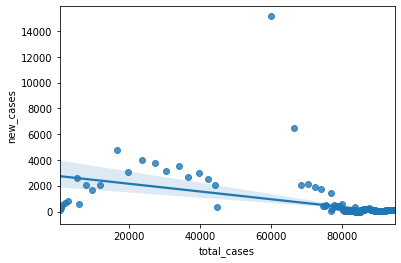

In [ ]:
sns.regplot(x='total_cases',y='new_cases',data=cn_df)

####最后画一个地图


In [ ]:
latest_df = df[df.date == latest_date].rename(columns={'location':'CNTRY_NAME'})

读取地图数据，并把地图数据和原来的数据合二为一

In [ ]:
map = gpd.read_file('https://opendata.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1.geojson')

In [ ]:
covid_map = pd.merge(map,latest_df,on='CNTRY_NAME')
crs = {'init':'epsg:4326'}
corona_gpd = gpd.GeoDataFrame(covid_map, crs=crs, geometry='geometry')
corona_gpd.head(5)

,OBJECTID,CNTRY_NAME,geometry,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ATG,North America,2020-12-17,151.0,0.0,0.714,5.0,0.0,0.143,1541.949,0.000,7.294,51.058,0.000,1.459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97928.0,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.780
1,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",AFG,Asia,2020-12-17,49378.0,217.0,189.286,2025.0,14.0,12.857,1268.433,5.574,4.862,52.019,0.360,0.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
2,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",DZA,Africa,2020-12-17,93933.0,426.0,479.143,2640.0,9.0,10.857,2142.093,9.715,10.927,60.204,0.205,0.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
3,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...",AZE,Asia,2020-12-17,191460.0,4124.0,4098.000,2088.0,38.0,42.143,18883.193,406.739,404.175,205.934,3.748,4.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10139175.0,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.70,73.00,0.757
4,6,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",ALB,Europe,2020-12-17,51424.0,787.0,766.143,1055.0,15.0,12.857,17869.206,273.473,266.225,366.599,5.212,4.468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785


从palettable库里面选定一个颜色

配色方案有很多种，详见[palettable的主页](https://jiffyclub.github.io/palettable/)

只需要更改其中的Dense_20即可

[Dense_20示例页面](https://jiffyclub.github.io/palettable/cmocean/sequential/#dense_20)

In [ ]:
from palettable.cmocean.sequential import Dense_20
from pprint import pprint
color = Dense_20.mpl_colormap

Text(0.5, 1.0, 'Coronavirus Total Death by Country')

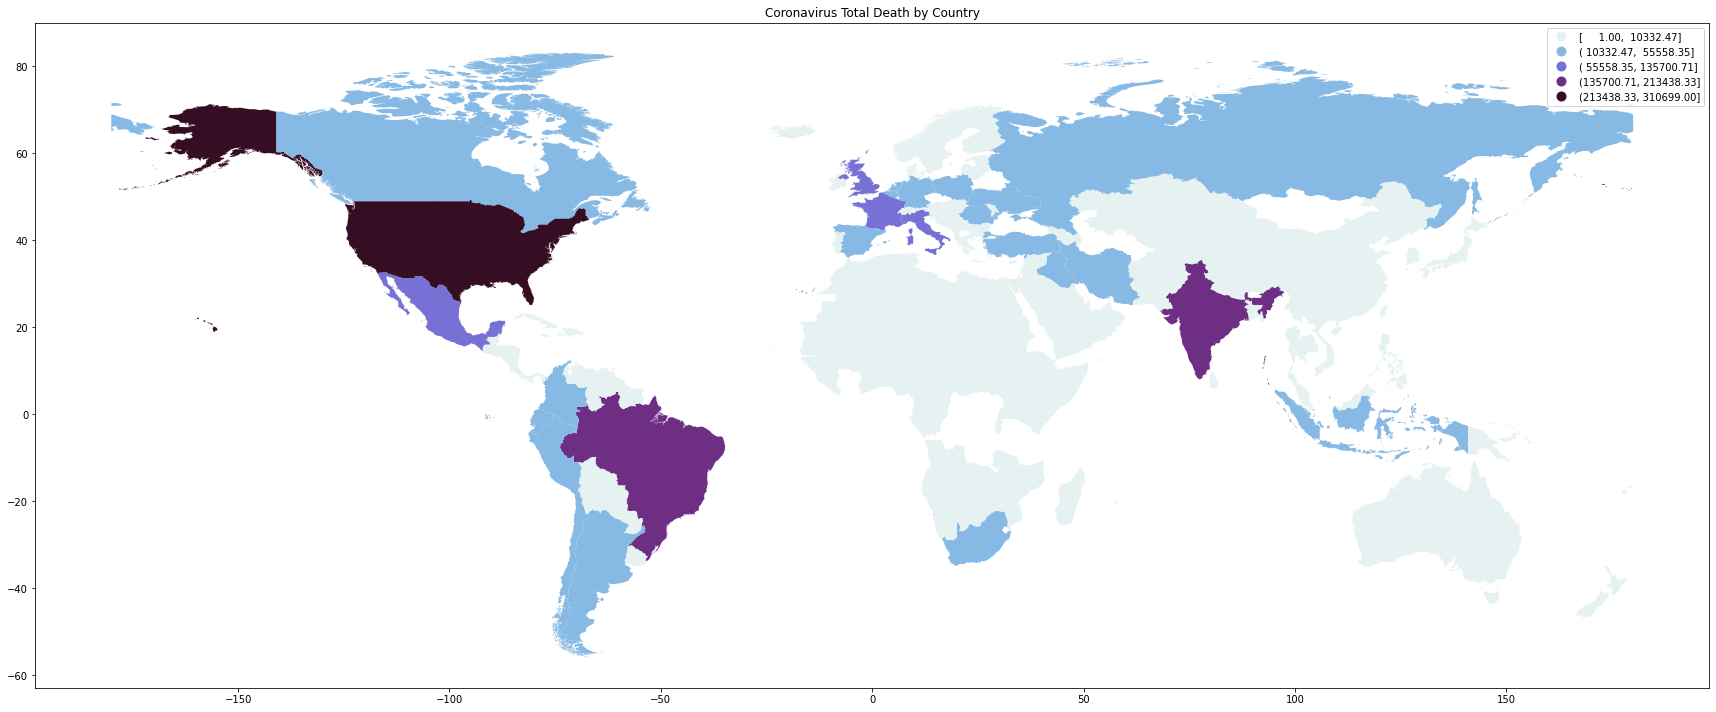

In [ ]:
ax = corona_gpd.plot(figsize=(30,18), column='total_deaths', cmap=color, scheme='HeadTailBreaks', k=9, alpha=1, legend=True, markersize = 0.5 )
plt.title('Coronavirus Total Death by Country')

大功告成！

2020.12.19的凌晨